In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path= ('/content/drive/MyDrive/Datasets/Titanic-Dataset.csv')
dataset = pd.read_csv(file_path)
dataset.head()


Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
dataset.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]>

In [ ]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dataset.shape

(891, 12)

In [ ]:
dataset.shape[0]

891

In [ ]:
dataset.shape[1]

12

In [ ]:
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# fill numerical values with mean
means = dataset.select_dtypes(include=np.number).mean()
dataset.fillna(means, inplace=True)
# fill categorical values with mode
mode = dataset.select_dtypes(exclude=np.number).mode()
modes = mode.iloc[0]
dataset[mode.columns] = dataset[mode.columns].fillna(modes)

# 3. Check if there are any null values left
dataset.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
dataset_new = dataset.drop(columns = 'SibSp',inplace = False)
dataset_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,B96 B98,S


In [ ]:
duplicate_samples = dataset[dataset.duplicated(keep=False)]
print(duplicate_samples)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin]
Index: []


In [ ]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dataset.shape

(891, 11)

In [ ]:
dataset.rename(columns={
    'PassengerId': 'Passenger ID',
    'Survived': 'Survival Status',
    'Pclass': 'Passenger Class',
    'Name': 'Full Name',
    'Sex': 'Gender',
    'Age': 'Age (Years)',
    'SibSp': 'Siblings/Spouses Aboard',
    'Parch': 'Parents/Children Aboard',
    'Ticket': 'Ticket Number',
    'Fare': 'Fare Paid',
    'Cabin': 'Cabin Number',
    'Embarked': 'Port of Embarkation'
}, inplace=True)

dataset.head()


,Passenger ID,Survival Status,Passenger Class,Full Name,Gender,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Ticket Number,Fare Paid,Cabin Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98


In [ ]:
life_expectancy_by_country = dataset.groupby('Passenger Class')['Fare Paid'].mean()
life_expectancy_by_country


,Fare Paid
Passenger Class,
1,84.154687
2,20.662183
3,13.675550


# **Gender Distribution chart**

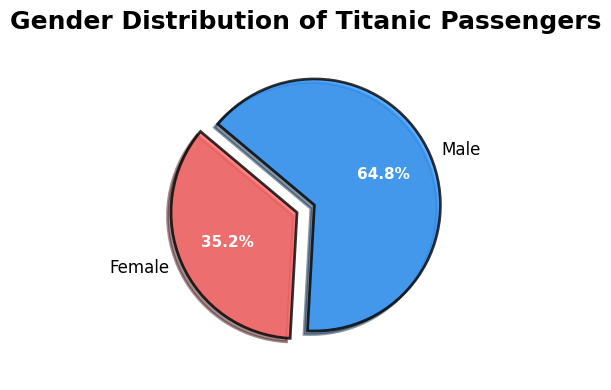

In [ ]:
colors = ['#ff6666', '#3399ff']
plt.figure(figsize=(4, 4))

mylabels = ['Female', 'Male']
myexplode = [0.05, 0.1]

values = [dataset['Gender'].value_counts()['female'], dataset['Gender'].value_counts()['male']]
wedges, texts, autotexts = plt.pie(values,
                                   labels=mylabels,
                                   explode=myexplode,
                                   shadow=True,
                                   autopct="%1.1f%%",
                                   startangle=140,
                                   colors=colors,
                                   wedgeprops={'edgecolor': 'black', 'linewidth': 2, 'alpha': 0.8})

for text in texts:
    text.set_fontsize(12)
    text.set_color('black')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.title("Gender Distribution of Titanic Passengers", fontsize=18, fontweight='bold')
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.tight_layout()
plt.show()


# **Survival Status of male/female**

Number of survivors by gender:
Gender
female    233
male      109
Name: Survival Status, dtype: int64


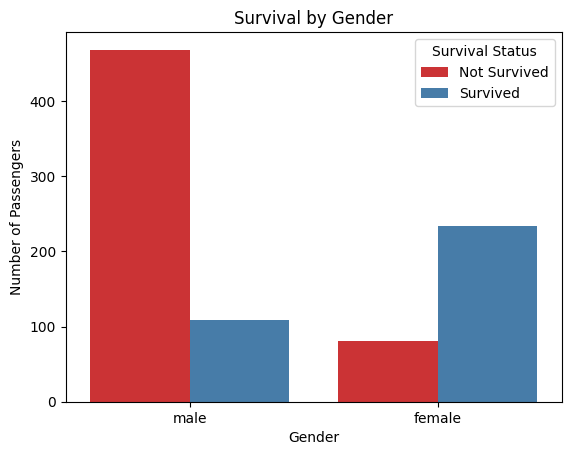

In [ ]:
survival_by_gender = dataset.groupby('Gender')['Survival Status'].sum()
total_passengers_by_gender = dataset['Gender'].value_counts()

print("Number of survivors by gender:")
print(survival_by_gender)

# Plotting the number of survivors by gender
sns.countplot(x='Gender', hue='Survival Status', data=dataset, palette='Set1')

# Adding title and labels
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')

# Adjusting the legend to show what 0 and 1 represent in survival
plt.legend(title='Survival Status', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

# **Number of survivors by passenger class**

Number of survivors by Passenger Class:
   Passenger Class  Number of Survivors
0                1                  136
1                2                   87
2                3                  119


<ipython-input-39-0add52bf1e35>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Passenger Class', y='Number of Survivors', data=survivors_by_class, palette='viridis')


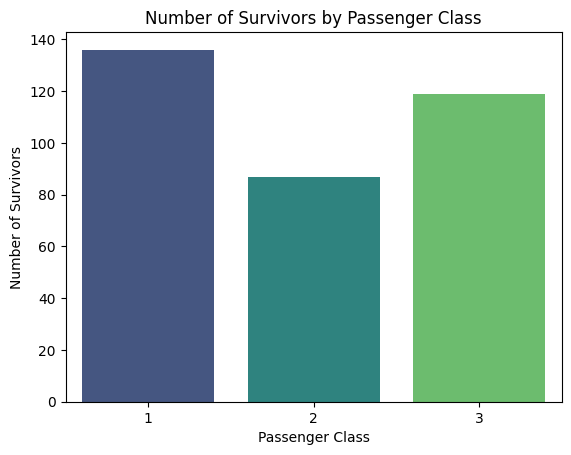

In [ ]:
survivors_by_class = dataset.groupby('Passenger Class')['Survival Status'].sum().reset_index()

# Rename columns for clarity
survivors_by_class.columns = ['Passenger Class', 'Number of Survivors']

print("Number of survivors by Passenger Class:")
print(survivors_by_class)

# Plotting the number of survivors by passenger class
sns.barplot(x='Passenger Class', y='Number of Survivors', data=survivors_by_class, palette='viridis')

# Adding title and axis labels
plt.title('Number of Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')

# Show the plot
plt.show()

# **Survival by age Distribution**

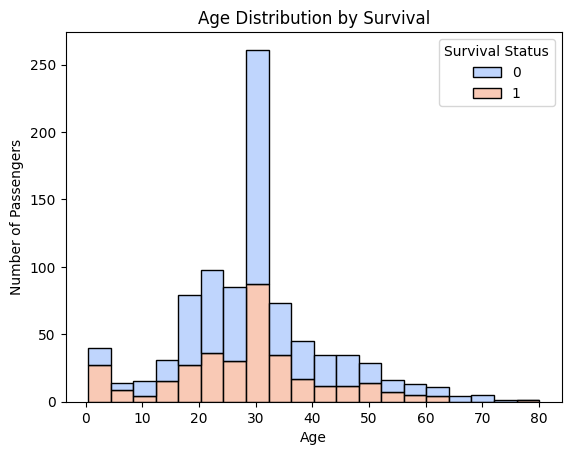

In [ ]:
sns.histplot(data=dataset, x='Age (Years)', hue='Survival Status', multiple='stack', palette='coolwarm', bins=20)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

# Show the plot
plt.show()


<ipython-input-46-ba2f157a6cb9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Survival Status', y='Fare Paid', palette='Set2')


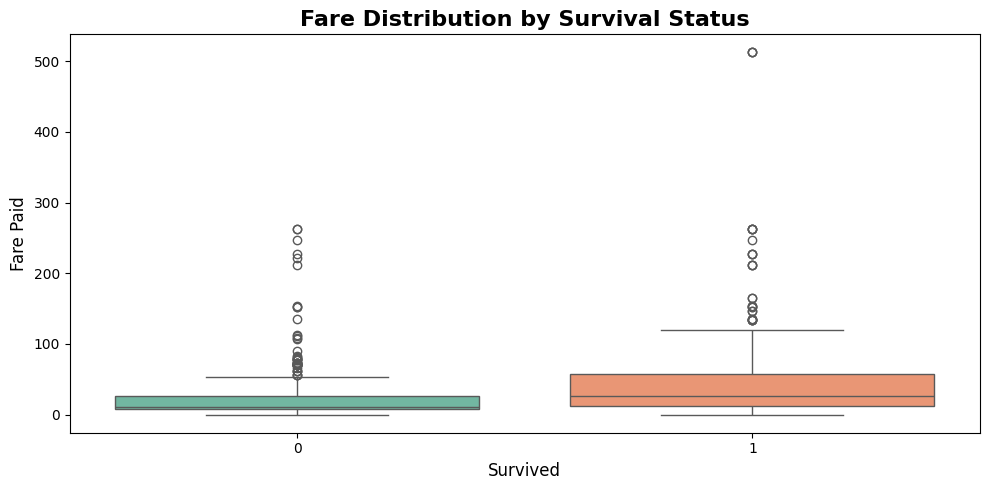

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='Survival Status', y='Fare Paid', palette='Set2')
plt.title('Fare Distribution by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Fare Paid', fontsize=12)

plt.tight_layout()
plt.show()


# **Removing outliers**

In [59]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
cleaned_dataset = remove_outliers(dataset, 'Age (Years)')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Fare Paid')
cleaned_dataset


,Passenger ID,Survival Status,Passenger Class,Full Name,Gender,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Ticket Number,Fare Paid,Cabin Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148


# **Bivariate graphs**

Although i have already created the graphs that are bivariate but i am plotting them again due to assignment requirement

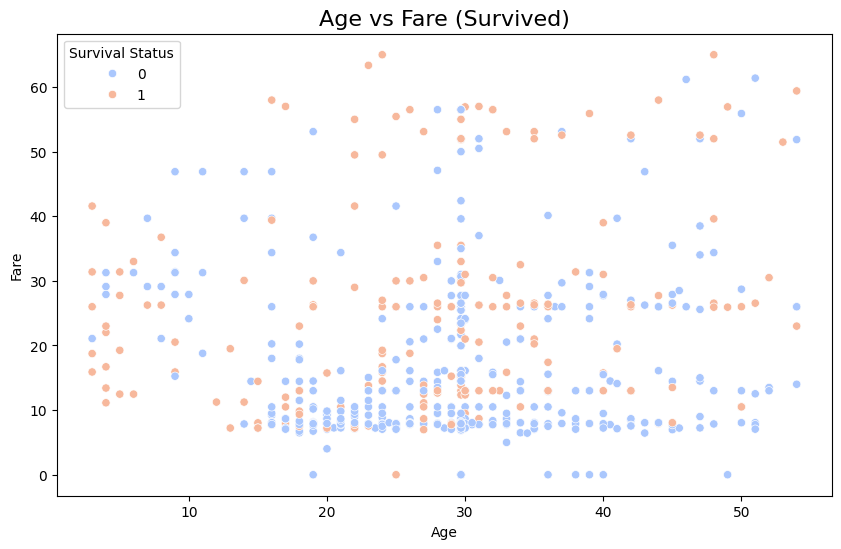

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_dataset, x='Age (Years)', y='Fare Paid', hue='Survival Status', palette='coolwarm')
plt.title('Age vs Fare (Survived)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


<ipython-input-58-acab3bf571f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_dataset, x='Survival Status', y='Age (Years)', palette='Set3')


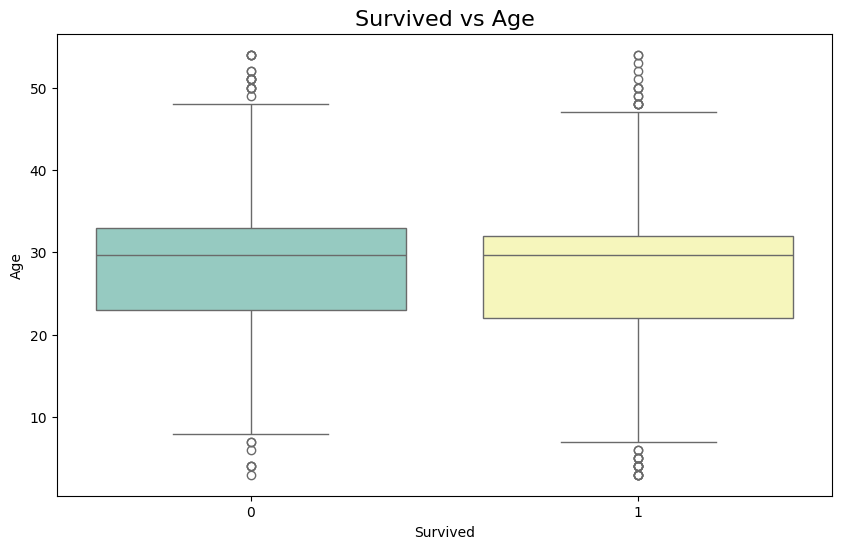

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dataset, x='Survival Status', y='Age (Years)', palette='Set3')
plt.title('Survived vs Age', fontsize=16)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


<ipython-input-56-4682c0106134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_dataset, x='Survival Status', y='Fare Paid', palette='Set2')


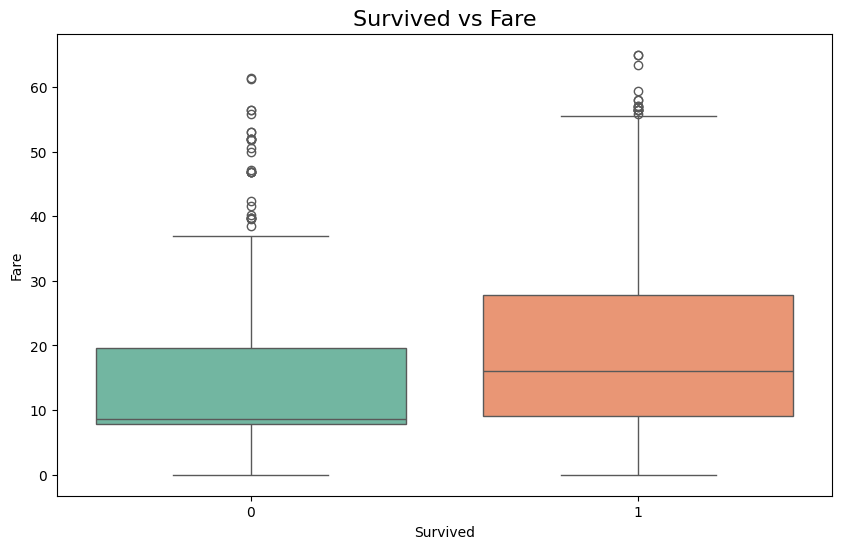

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_dataset, x='Survival Status', y='Fare Paid', palette='Set2')
plt.title('Survived vs Fare', fontsize=16)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()
